In [14]:
import numpy as np
import sympy as sym
from sympy.abc import t
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from sympy import init_printing
init_printing() 

In [2]:
def Rx(angle):
    rot = sym.zeros(3, 3)  
    rot[0, 0] = 1
    rot[1, 1] = sym.cos(angle)
    rot[1, 2] = -sym.sin(angle)
    rot[2, 1] = sym.sin(angle)
    rot[2, 2] = sym.cos(angle)
    return rot   

def Ry(angle):
    rot = sym.zeros(3, 3)  
    rot[0, 0] = sym.cos(angle)
    rot[0, 2] = sym.sin(angle)
    rot[1, 1] = 1
    rot[2, 0] = -sym.sin(angle)
    rot[2, 2] = sym.cos(angle)
    return rot 

def Rz(angle):
    rot = sym.zeros(3, 3)  
    rot[0, 0] = sym.cos(angle)
    rot[0, 1] = -sym.sin(angle)
    rot[1, 0] = sym.sin(angle)
    rot[1, 1] = sym.cos(angle)
    rot[2, 2] = 1
    return rot   

def trans3D(R, p):
    T = sym.zeros(4, 4)
    T[0:3, 0:3] = R
    T[0, 3] = p[0]
    T[1, 3] = p[1]
    T[2, 3] = p[2]
    T[3, 3] = 1

    return T

In [3]:
lht = 0.077 # hip to thigh 
ltc = 0.211 # thigh to calf 
lcf = 0.230 # calf to foot

theta1, theta2, theta3 = sym.symbols(r'\theta_1 \theta_2 \theta_3')
l1, l2, l3 = sym.symbols(r'l1 l2 l3')
x, y, z = sym.symbols('x y z')

q = sym.Matrix([theta1, theta2, theta3])


# eq = sym.Eq(sym.Matrix([x, y]), sym.Matrix([theta1 + y, theta2 + x]))
# eq_soln = sym.solve(eq, [theta1, theta2])

# display(eq)
# display(eq_soln)


In [13]:
############################################################################
# FRONT LEFT FK
# Tb0_FL = trans3D(sym.eye(3), [0.196, 0.050, 0]) # trunk to FL 0
# T01_FL = trans3D(Rx(theta1), [0, 0, 0])
# T12_FL = trans3D(Ry(theta2), [0, l1, 0])
# T23_FL = trans3D(Ry(theta3), [0, 0, -l2])
# T34_FL = trans3D(sym.eye(3), [0, 0, -l3])

T01_FL = trans3D(Rx(theta1), [0, 0, 0])
T12_FL = trans3D(Ry(theta2), [0, l1, 0])
T23_FL = trans3D(Ry(theta3), [0, 0, l2])
T34_FL = trans3D(sym.eye(3), [0, 0, l3])

# Tb_FL_foot = Tb0_FL * T01_FL * T12_FL * T23_FL * T34_FL
Tb_FL_foot = T01_FL * T12_FL * T23_FL * T34_FL
# Tb_FL_foot_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], Tb_FL_foot)

# Tb_FL_foot_eval = Tb_FL_foot_lam(0.63, 1.04, -1.60, lht, ltc, lcf)

# print("FL foor position relative to base: ", Tb_FL_foot_eval[0:3,3])
# print("FL foot orientation :", R.from_matrix(Tb_FL_foot_eval[0:3, 0:3]).as_quat()) # (x, y, z, w) 

p_FL = Tb_FL_foot[0:3,3] # position of foot 
# p_FL_eq = sym.Eq(sym.Matrix([x, y, z]), p_FL)
p_FL_eq = sym.Eq(x, p_FL[0])


# # J_FL = p_FL.jacobian(q) # jacobian of leg  

# display(p_FL)
display(p_FL_eq)


# p_FL_eq = sym.Eq(sym.Matrix([FLpx, FLpy, FLpz]), p_FL)

# FL_IK = sym.solve(sym.simplify(p_FL_eq), [theta1, theta2, theta3]) # inverse kinematics 
# display(FL_IK)

FL_IK = sym.solve(p_FL_eq, theta3)
display(FL_IK)

# J_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], J_FL)

# display(Tb_FL_foot_lam(0.63, 1.04, -1.60, lht, ltc, lcf))
# display(sym.simplify(Tb_FL_foot))
# display(p_FL)
# display(p_FL_eq)
# display(sym.simplify(J_FL))
# display(pFL_lhs)
# display(sym.simplify(J_FL))
# display(J_FL)
# # display(FL_IK)
# display(J_lam(0.63, 1.04, -1.60, lht, ltc, lcf))


Eq(x, l2*sin(\theta_2) + l3*(sin(\theta_2)*cos(\theta_3) + sin(\theta_3)*cos(\theta_2)))

[2*atan((cos(\theta_3) + 1)*(l2*tan(\theta_3/2)**2 + l2 - l3*tan(\theta_3/2)**2 + l3 - sqrt(l2**2*tan(\theta_3/2)**4 + 2*l2**2*tan(\theta_3/2)**2 + l2**2 - 2*l2*l3*tan(\theta_3/2)**4 + 2*l2*l3 + l3**2*tan(\theta_3/2)**4 + 2*l3**2*tan(\theta_3/2)**2 + l3**2 - x**2*tan(\theta_3/2)**4 - 2*x**2*tan(\theta_3/2)**2 - x**2))/(2*(l3*sin(\theta_3) + x))),
 2*atan((cos(\theta_3) + 1)*(l2*tan(\theta_3/2)**2 + l2 - l3*tan(\theta_3/2)**2 + l3 + sqrt(l2**2*tan(\theta_3/2)**4 + 2*l2**2*tan(\theta_3/2)**2 + l2**2 - 2*l2*l3*tan(\theta_3/2)**4 + 2*l2*l3 + l3**2*tan(\theta_3/2)**4 + 2*l3**2*tan(\theta_3/2)**2 + l3**2 - x**2*tan(\theta_3/2)**4 - 2*x**2*tan(\theta_3/2)**2 - x**2))/(2*(l3*sin(\theta_3) + x)))]

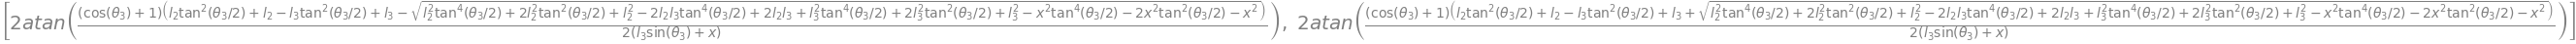

In [18]:
# display(FL_IK)


# display(Tb_FL_foot[0:3,3])

# ############################################################################
# # FRONT RIGHT FK
# Tb0_FR = trans3D(sym.eye(3), [0.196, -0.050, 0]) # trunk to FR 0
# T01_FR = trans3D(Rx(theta1), [0, 0, 0])
# T12_FR = trans3D(Ry(theta2), [0, -l1, 0])
# T23_FR = trans3D(Ry(theta3), [0, 0, -l2])
# T34_FR = trans3D(sym.eye(3), [0, 0, -l3])

# Tb_FR_foot = Tb0_FR * T01_FR * T12_FR * T23_FR * T34_FR
# Tb_FR_foot_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], Tb_FR_foot)

# Tb_FR_foot_eval = Tb_FR_foot_lam(0.63, 1.04, -1.60, lht, ltc, lcf)

# print("FR foor position relative to base: ", Tb_FR_foot_eval[0:3,3])
# print("FR foot orientation :", R.from_matrix(Tb_FR_foot_eval[0:3, 0:3]).as_quat()) # (x, y, z, w)

# p_FR = Tb_FR_foot[0:3,3] # position of foot 
# J_FR = p_FR.jacobian(q) # jacobian of leg  
# J_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], J_FR)
# display(J_lam(0.63, 1.04, -1.60, lht, ltc, lcf))

In [7]:
############################################################################
# REAR LEFT FK
Tb0_RL = trans3D(sym.eye(3), [-0.196, 0.050, 0]) # trunk to RL 0
T01_RL = trans3D(Rx(theta1), [0, 0, 0])
T12_RL = trans3D(Ry(theta2), [0, l1, 0])
T23_RL = trans3D(Ry(theta3), [0, 0, -l2])
T34_RL = trans3D(sym.eye(3), [0, 0, -l3])

Tb_RL_foot = Tb0_RL * T01_RL * T12_RL * T23_RL * T34_RL
Tb_RL_foot_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], Tb_RL_foot)

Tb_RL_foot_eval = Tb_RL_foot_lam(0.63, 1.04, -1.60, lht, ltc, lcf)

print("RL foor position relative to base: ", Tb_RL_foot_eval[0:3,3])
print("RL foot orientation :", R.from_matrix(Tb_RL_foot_eval[0:3, 0:3]).as_quat()) # (x, y, z, w)

p_RL = Tb_RL_foot[0:3,3] # position of foot 
J_RL = p_RL.jacobian(q) # jacobian of leg  
J_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], J_RL)
display(J_lam(0.63, 1.04, -1.60, lht, ltc, lcf))

RL foor position relative to base:  [-0.25579447  0.28995199 -0.19840252]
RL foot orientation : [ 0.2977508  -0.26275795 -0.08561953  0.91376803]


array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.19840252, -0.0352276 ,  0.07197748],
       [ 0.23995199,  0.04831557, -0.098719  ]])

In [8]:
############################################################################
# REAR RIGHT FK
Tb0_RR = trans3D(sym.eye(3), [-0.196, -0.050, 0]) # trunk to RR 0
T01_RR = trans3D(Rx(theta1), [0, 0, 0])
T12_RR = trans3D(Ry(theta2), [0, -l1, 0])
T23_RR = trans3D(Ry(theta3), [0, 0, -l2])
T34_RR = trans3D(sym.eye(3), [0, 0, -l3])

Tb_RR_foot = Tb0_RR * T01_RR * T12_RR * T23_RR * T34_RR
Tb_RR_foot_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], Tb_RR_foot)

Tb_RR_foot_eval = Tb_RR_foot_lam(0.63, 1.04, -1.60, lht, ltc, lcf)

print("RR foor position relative to base: ", Tb_RR_foot_eval[0:3,3])
print("RR foot orientation :", R.from_matrix(Tb_RR_foot_eval[0:3, 0:3]).as_quat()) # (x, y, z, w)

p_RR = Tb_RR_foot[0:3,3] # position of foot 
J_RR = p_RR.jacobian(q) # jacobian of leg  
J_lam = sym.lambdify([theta1, theta2, theta3, l1, l2, l3], J_RR)
display(J_lam(0.63, 1.04, -1.60, lht, ltc, lcf))

RR foor position relative to base:  [-0.25579447  0.06551575 -0.28913081]
RR foot orientation : [ 0.2977508  -0.26275795 -0.08561953  0.91376803]


array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.28913081, -0.0352276 ,  0.07197748],
       [ 0.11551575,  0.04831557, -0.098719  ]])

In [9]:
FL
array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.19840252, -0.0352276 ,  0.07197748],
       [ 0.23995199,  0.04831557, -0.098719  ]])

FR 
array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.28913081, -0.0352276 ,  0.07197748],
       [ 0.11551575,  0.04831557, -0.098719  ]])

RL
array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.19840252, -0.0352276 ,  0.07197748],
       [ 0.23995199,  0.04831557, -0.098719  ]])

RR
array([[ 0.        , -0.30168115, -0.19486868],
       [ 0.28913081, -0.0352276 ,  0.07197748],
       [ 0.11551575,  0.04831557, -0.098719  ]])

NameError: name 'FL' is not defined